# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
%pip install --upgrade plotly

## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [6]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
print("Poverty Data Shape:", df_pct_poverty.shape)
print("High School Completion Data Shape:", df_pct_completed_hs.shape)
print("Race Data Shape:", df_share_race_city.shape)
print("Fatalities Data Shape:", df_fatalities.shape)

Poverty Data Shape: (29329, 3)
High School Completion Data Shape: (29329, 3)
Race Data Shape: (29268, 7)
Fatalities Data Shape: (2535, 14)


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [17]:
# Check for missing values
print("\nMissing values in Poverty Data:")
print(df_pct_poverty.isnull().sum())
print("\nMissing values in High School Completion Data:")
print(df_pct_completed_hs.isnull().sum())
print("\nMissing values in Race Data:")
print(df_share_race_city.isnull().sum())
print("\nMissing values in Fatalities Data:")
print(df_fatalities.isnull().sum())


Missing values in Poverty Data:
Geographic Area    0
City               0
poverty_rate       0
dtype: int64

Missing values in High School Completion Data:
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

Missing values in Race Data:
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

Missing values in Fatalities Data:
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


In [19]:
# Fill missing values with 0 where appropriate
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [31]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

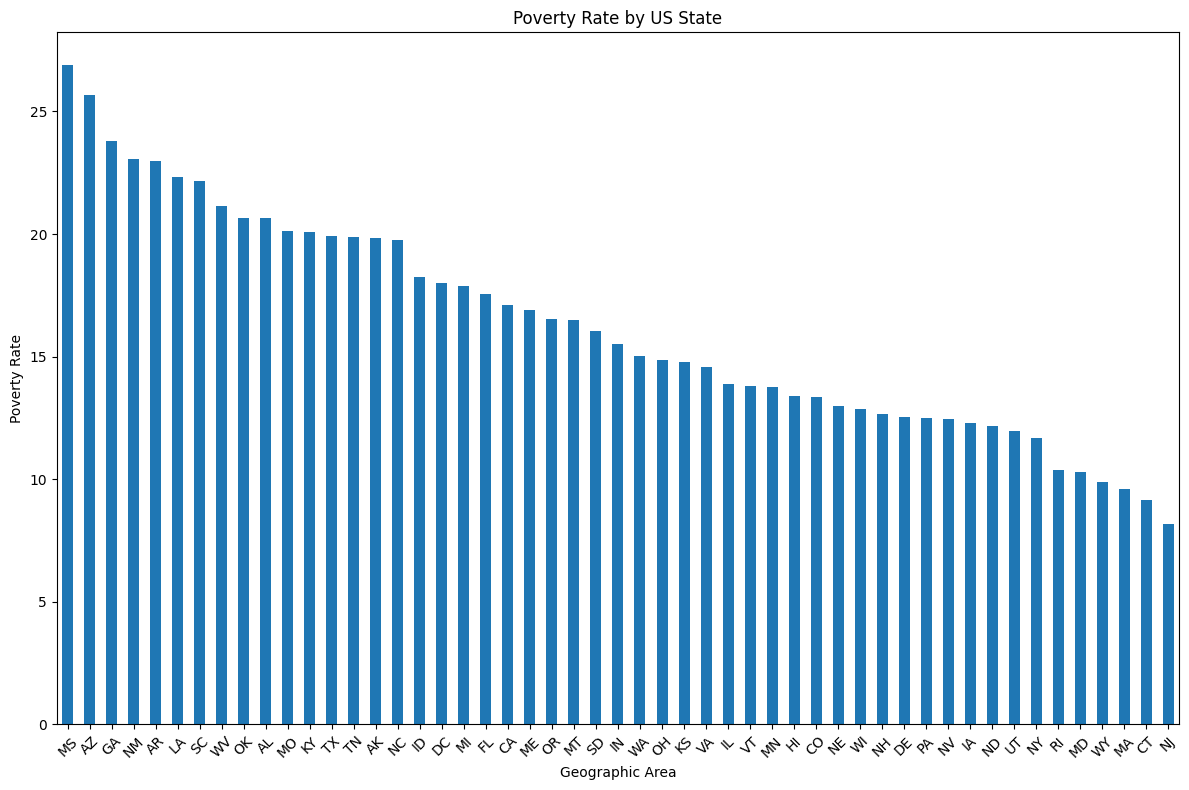

In [32]:
plt.figure(figsize=(12, 8))
poverty_by_state.plot(kind='bar')
plt.title('Poverty Rate by US State')
plt.ylabel('Poverty Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [38]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

hs_grad_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True)

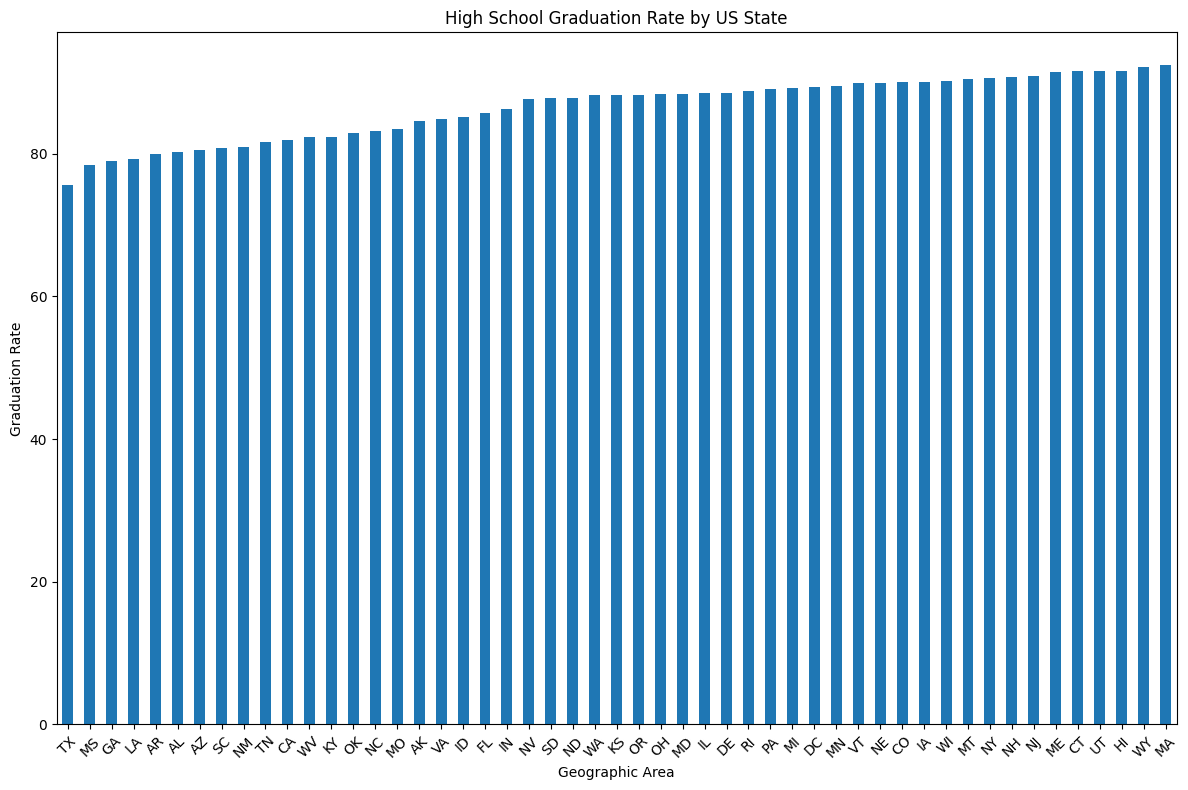

In [39]:
plt.figure(figsize=(12, 8))
hs_grad_by_state.plot(kind='bar')
plt.title('High School Graduation Rate by US State')
plt.ylabel('Graduation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [41]:
poverty_rates = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
hs_rates = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()

combined = pd.DataFrame({
    'Poverty Rate': poverty_rates,
    'HS Graduation Rate': hs_rates
}).dropna()

/tmp/ipython-input-3510860201.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(combined.index, rotation=45)


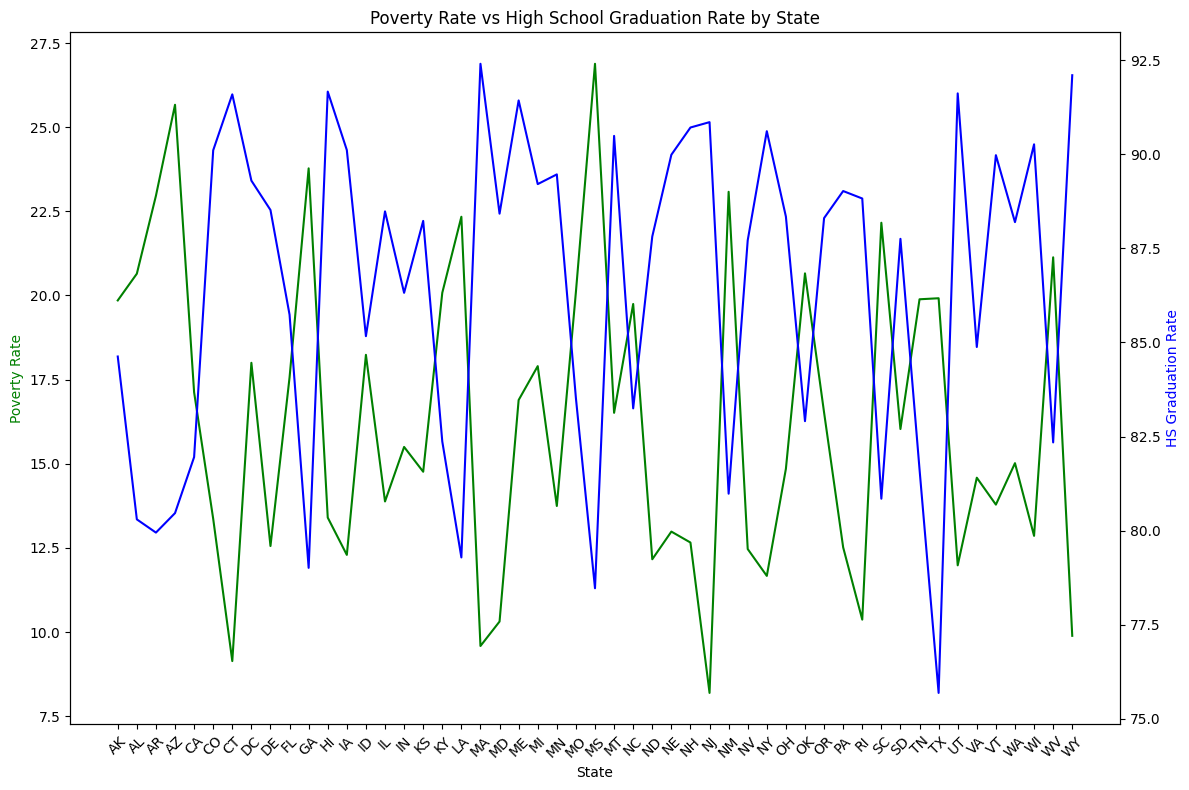

In [42]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax2 = ax1.twinx()
ax1.plot(combined.index, combined['Poverty Rate'], 'g-')
ax2.plot(combined.index, combined['HS Graduation Rate'], 'b-')

ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate', color='g')
ax2.set_ylabel('HS Graduation Rate', color='b')
ax1.set_xticklabels(combined.index, rotation=45)
plt.title('Poverty Rate vs High School Graduation Rate by State')
plt.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

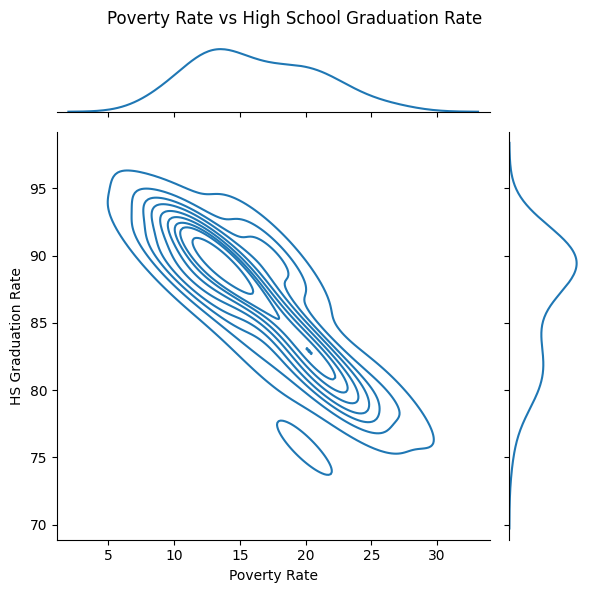

In [43]:
sns.jointplot(x=combined['Poverty Rate'], y=combined['HS Graduation Rate'], kind='kde')
plt.suptitle('Poverty Rate vs High School Graduation Rate')
plt.tight_layout()
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

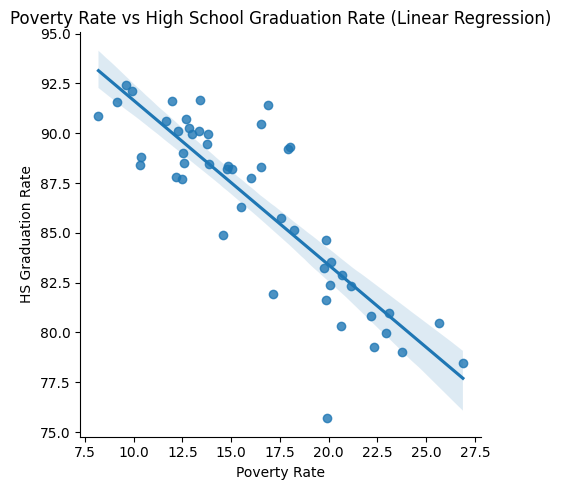

In [44]:
sns.lmplot(x='Poverty Rate', y='HS Graduation Rate', data=combined)
plt.title('Poverty Rate vs High School Graduation Rate (Linear Regression)')
plt.tight_layout()
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [50]:
# Convert only the race share columns to numeric
race_columns = ['share_white', 'share_black', 'share_native_american',
                'share_asian', 'share_hispanic']

for col in race_columns:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

# Now perform the groupby
race_by_state = df_share_race_city.groupby('Geographic area')[race_columns].mean()
race_by_state = race_by_state[['share_white', 'share_black', 'share_native_american',
                              'share_asian', 'share_hispanic']]

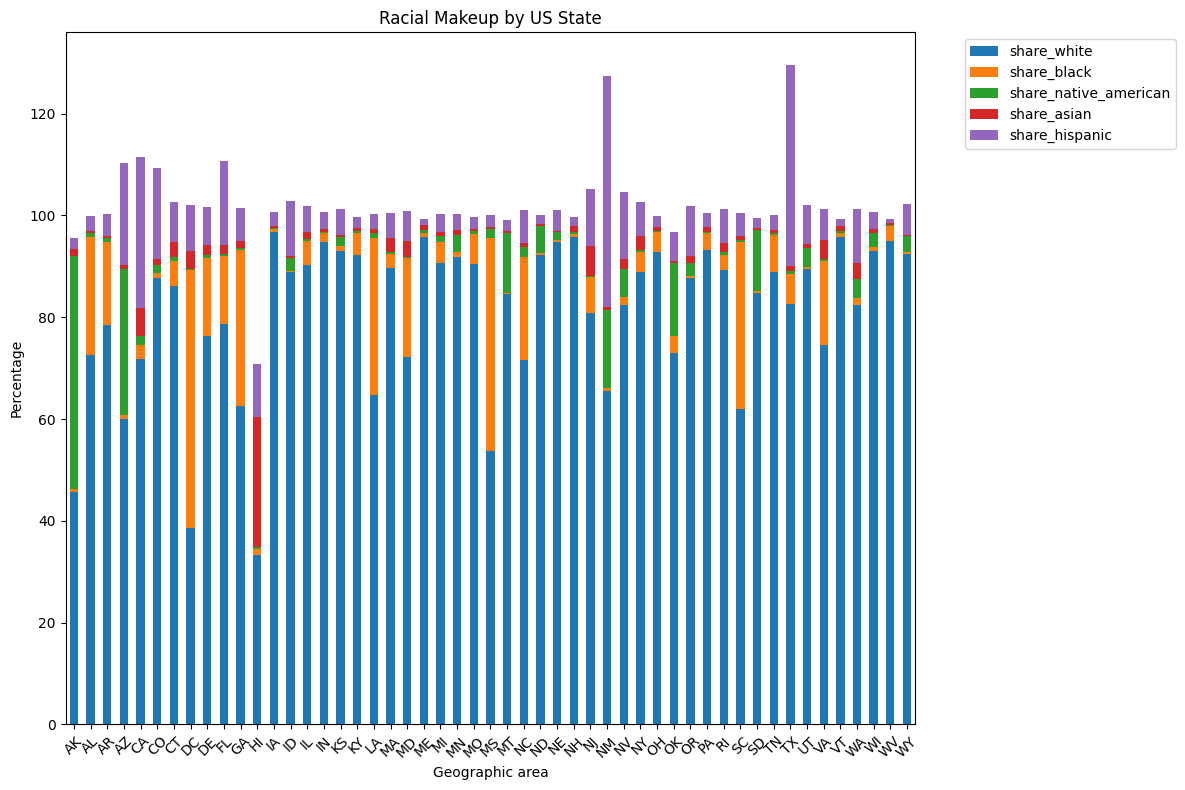

In [51]:
race_by_state.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Racial Makeup by US State')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

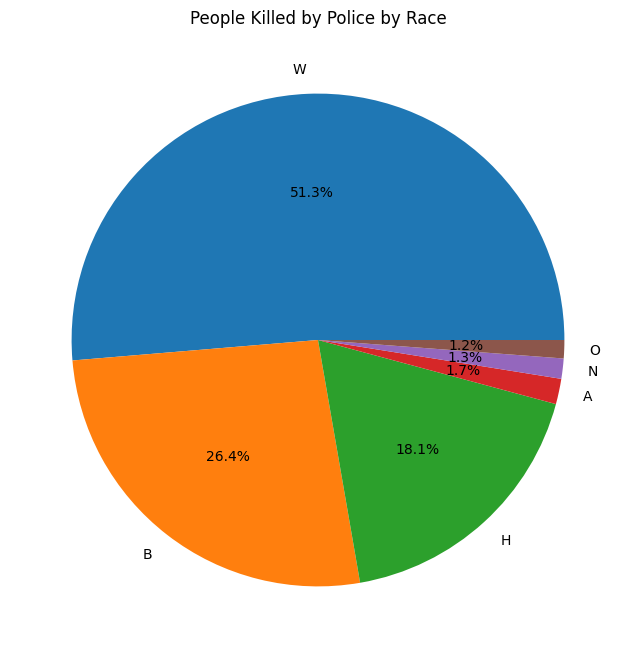

In [52]:
race_counts = df_fatalities['race'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(race_counts.values, labels=race_counts.index, autopct='%1.1f%%')
plt.title('People Killed by Police by Race')
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [53]:
gender_counts = df_fatalities['gender'].value_counts()

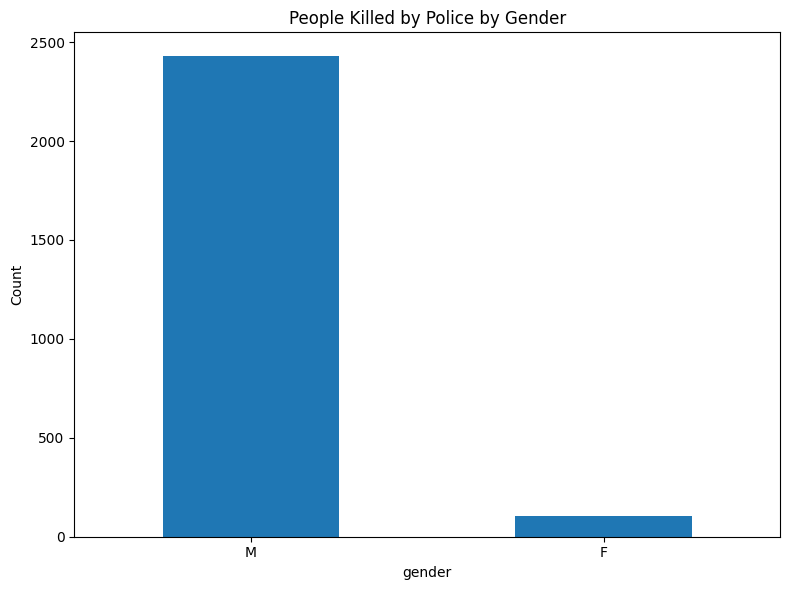

In [54]:
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('People Killed by Police by Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

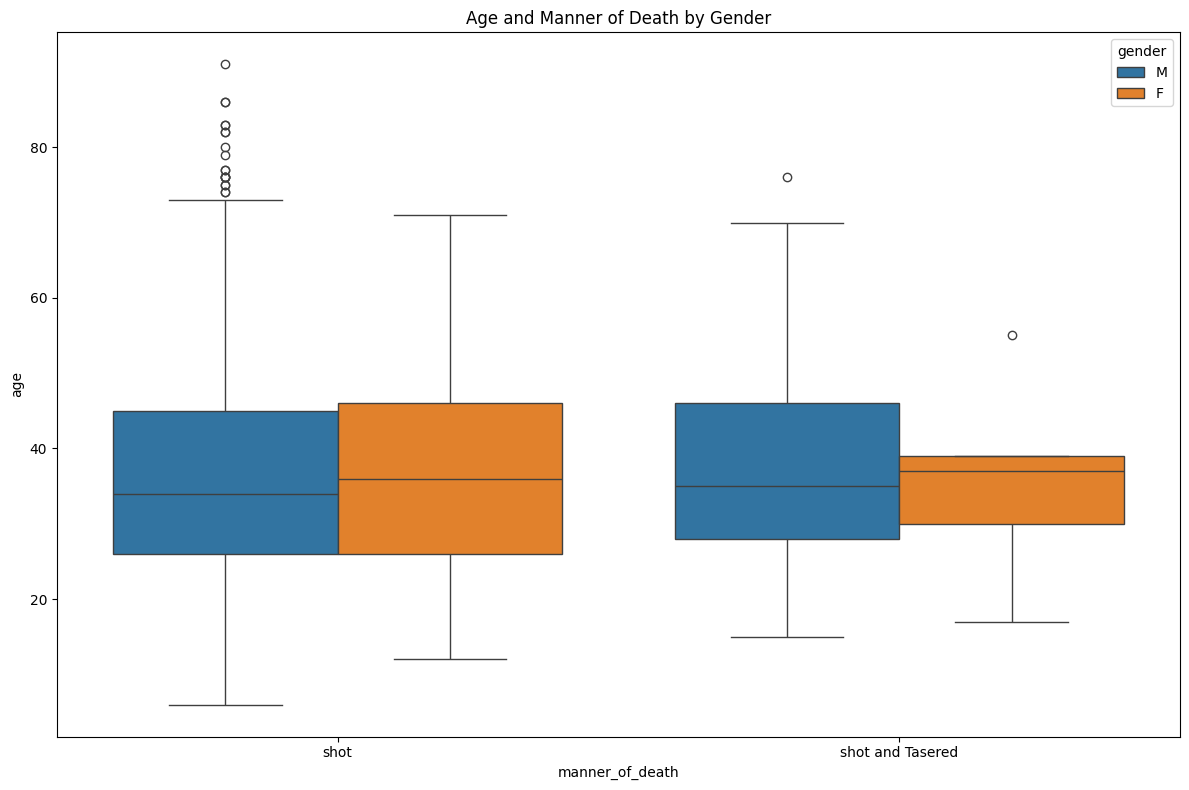

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities)
plt.title('Age and Manner of Death by Gender')
plt.tight_layout()
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [56]:
armed_counts = df_fatalities['armed'].value_counts()
print("Armed status of people killed by police:")
print(armed_counts.head(10))

Armed status of people killed by police:
armed
gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
machete             18
ax                   9
Taser                9
Name: count, dtype: int64


In [57]:
armed_status = df_fatalities['armed'].apply(lambda x: 'armed' if x != 'unarmed' else 'unarmed')
armed_status_counts = armed_status.value_counts()

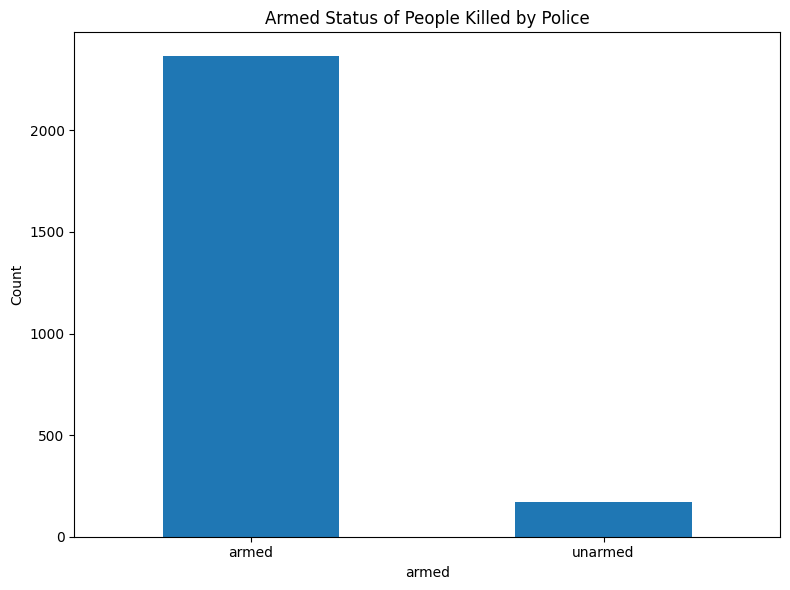

In [58]:
plt.figure(figsize=(8, 6))
armed_status_counts.plot(kind='bar')
plt.title('Armed Status of People Killed by Police')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [59]:
under_25 = (df_fatalities['age'] < 25).sum()
total_known_age = df_fatalities['age'].notna().sum()
pct_under_25 = (under_25 / total_known_age) * 100
print(f"Percentage of people killed under 25 years old: {pct_under_25:.2f}%")

Percentage of people killed under 25 years old: 18.31%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

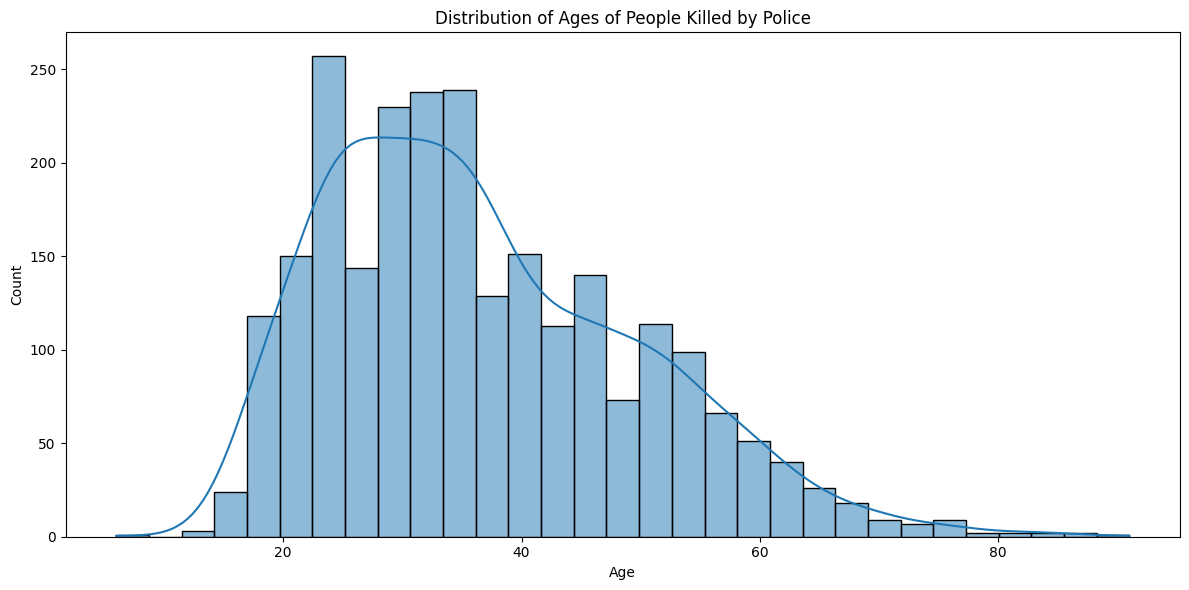

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(df_fatalities['age'].dropna(), kde=True)
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

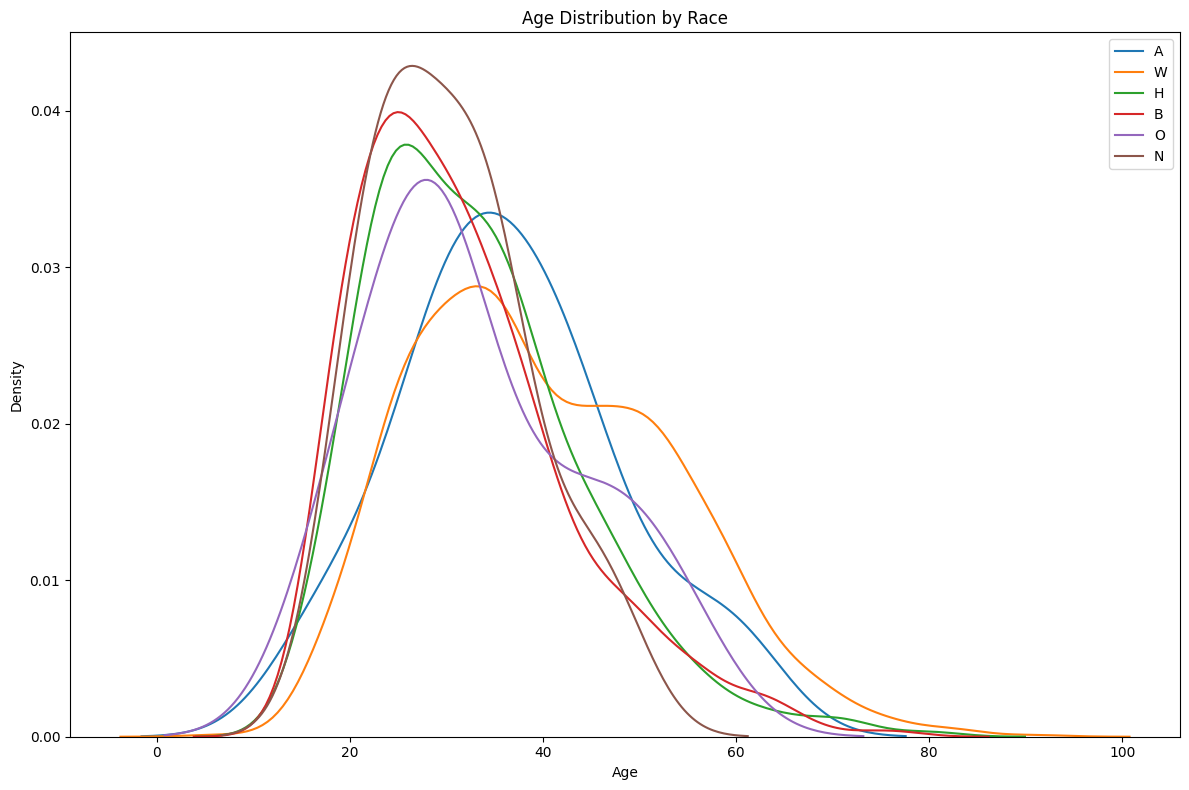

In [61]:
plt.figure(figsize=(12, 8))
for race in df_fatalities['race'].unique():
    if pd.notna(race):
        subset = df_fatalities[df_fatalities['race'] == race]['age'].dropna()
        sns.kdeplot(subset, label=race)
plt.title('Age Distribution by Race')
plt.xlabel('Age')
plt.legend()
plt.tight_layout()
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

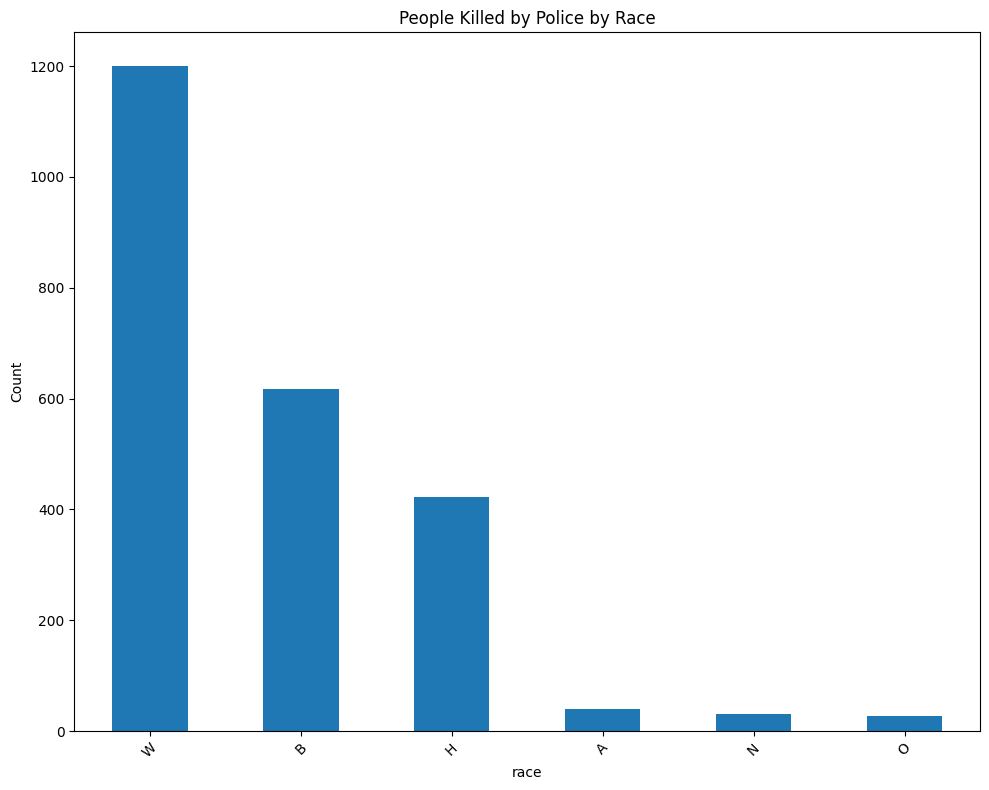

In [62]:
plt.figure(figsize=(10, 8))
race_counts = df_fatalities['race'].value_counts()
race_counts.plot(kind='bar')
plt.title('People Killed by Police by Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [63]:
mental_illness_counts = df_fatalities['signs_of_mental_illness'].value_counts()
pct_mental_illness = (mental_illness_counts[True] / mental_illness_counts.sum()) * 100
print(f"Percentage of people killed with signs of mental illness: {pct_mental_illness:.2f}%")

Percentage of people killed with signs of mental illness: 24.97%


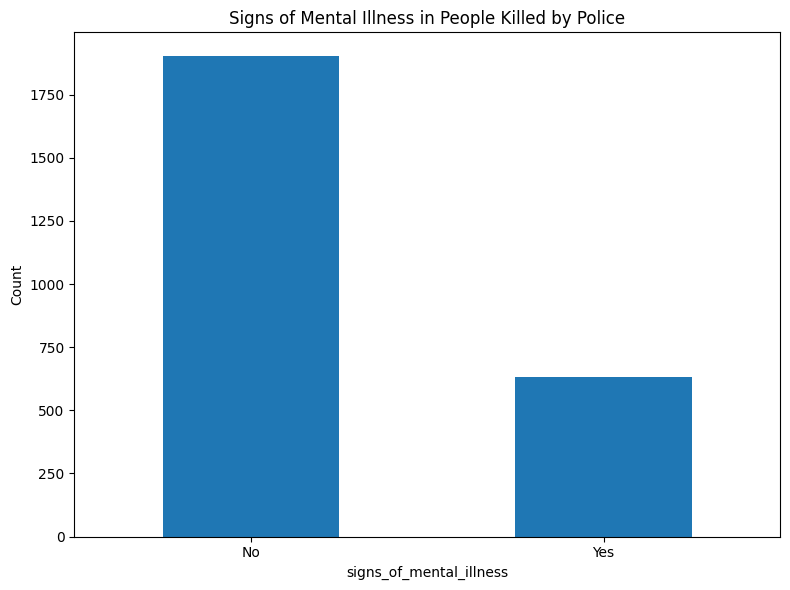

In [64]:
plt.figure(figsize=(8, 6))
mental_illness_counts.plot(kind='bar')
plt.title('Signs of Mental Illness in People Killed by Police')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [65]:
top_cities = df_fatalities['city'].value_counts().head(10)

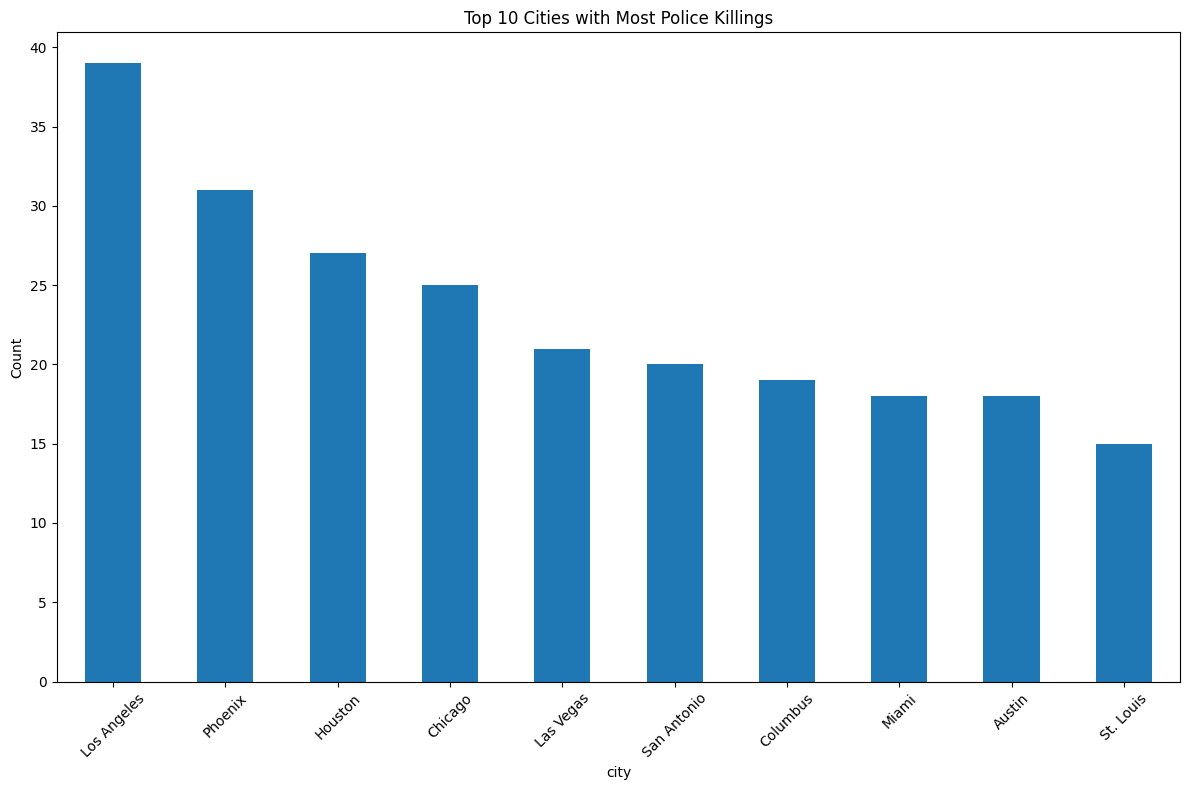

In [66]:
plt.figure(figsize=(12, 8))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities with Most Police Killings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [67]:
fatalities_by_state = df_fatalities['state'].value_counts()

In [68]:
fig = px.choropleth(
    locations=fatalities_by_state.index,
    locationmode="USA-states",
    color=fatalities_by_state.values,
    scope="usa",
    title='Police Killings by US State',
    color_continuous_scale='Reds'
)
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [70]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
fatalities_over_time = df_fatalities.set_index('date').resample('ME').size()

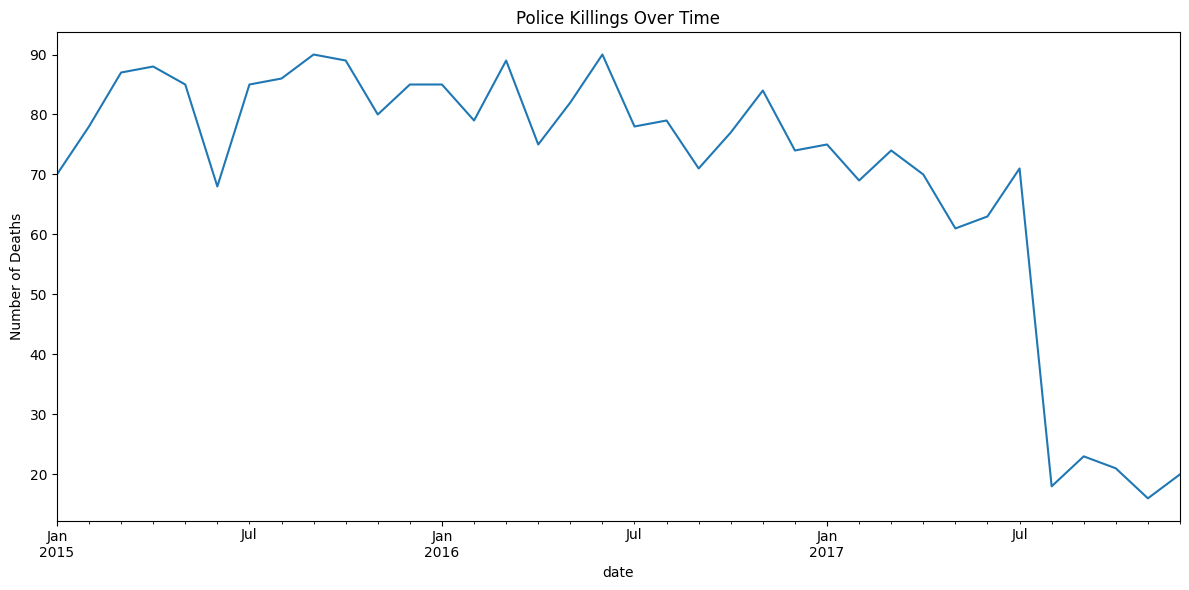

In [71]:
plt.figure(figsize=(12, 6))
fatalities_over_time.plot()
plt.title('Police Killings Over Time')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()

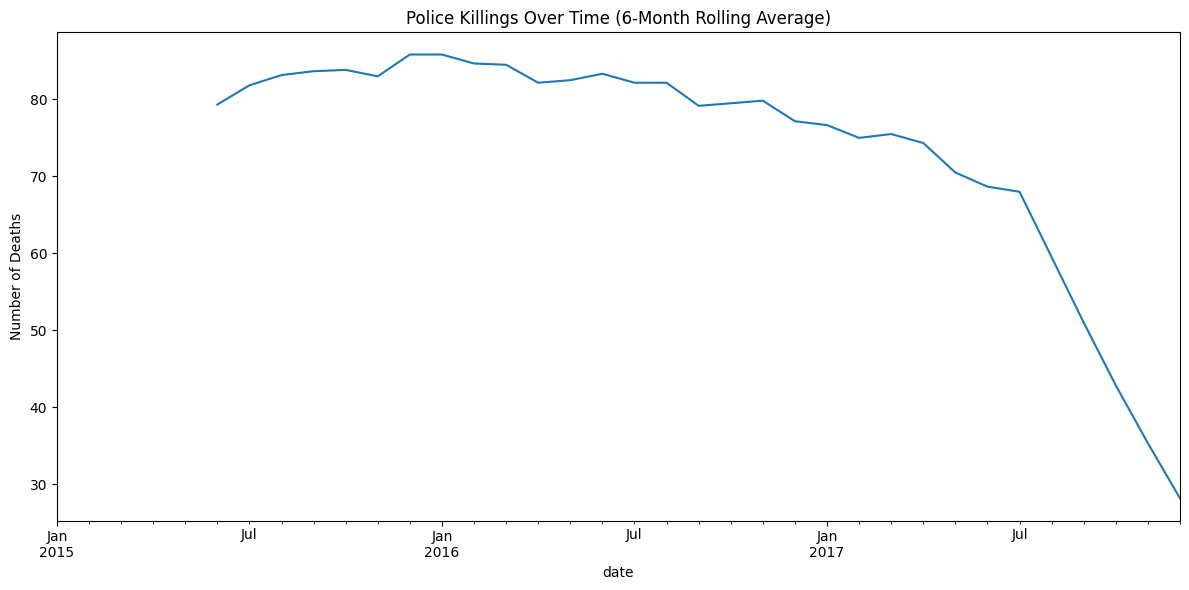

In [72]:
# Rolling average to see trend
plt.figure(figsize=(12, 6))
fatalities_over_time.rolling(6).mean().plot()
plt.title('Police Killings Over Time (6-Month Rolling Average)')
plt.ylabel('Number of Deaths')
plt.tight_layout()
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).